**To check the gpu :**
!nvidia-smi

In [ ]:
!nvidia-smi

Wed Dec 23 17:41:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |     10MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Installing the tensor Flow library.**

In [ ]:
!pip install tensorflow-gpu

**Version of Tensor Flow**

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [ ]:
# Importing the library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Datasets.csv')
X= dataset.iloc[:, 3:13]
y= dataset.iloc[:, 13]

In [ ]:
#Creating dummy variable:
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
#Concatenate the dataset
X = pd.concat([X,geography,gender],axis=1)

In [ ]:
#Drop Un-necesaryu columns
X= X.drop(['Geography','Gender'],axis=1)

In [ ]:
#Spliting the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ***Making the ANN***

In [ ]:
#Importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [ ]:
# Initialising the ANN
clasifier = Sequential()

In [ ]:
#Adding the input layer and first hidden layer
clasifier.add(Dense(units=6, kernel_initializer = 'he_uniform',activation ='relu',input_dim=11))

In [ ]:
#Adding the second hidden layer
clasifier.add(Dense(units=6, kernel_initializer = 'he_uniform', activation ='relu'))

In [ ]:
#Adding the output layer
clasifier.add(Dense(units=1, kernel_initializer = 'glorot_uniform', activation ='sigmoid'))

In [ ]:
#Compiling the ANN
clasifier.compile(optimizer ='Adamax', loss='binary_crossentropy', metrics=["binary_accuracy"])

In [ ]:
#Fitting the ANN to the Training Set
model_history= clasifier.fit(X_train, y_train, validation_split = 0.33, batch_size=10)

536/536 [==============================] - 1s 1ms/step - loss: 0.4617 - binary_accuracy: 0.7962 - val_loss: 0.4600 - val_binary_accuracy: 0.7955


In [ ]:
print(X_test)

[[-0.55204276 -0.36890377  1.04473698 ...  1.75486502 -0.57369368
  -1.09168714]
 [-1.31490297  0.10961719 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 [ 0.57162971  0.30102557  1.04473698 ... -0.5698444   1.74309049
  -1.09168714]
 ...
 [-0.74791227 -0.27319958 -1.37744033 ... -0.5698444   1.74309049
   0.91601335]
 [-0.00566991 -0.46460796 -0.33936434 ...  1.75486502 -0.57369368
   0.91601335]
 [-0.79945688 -0.84742473  1.04473698 ...  1.75486502 -0.57369368
   0.91601335]]


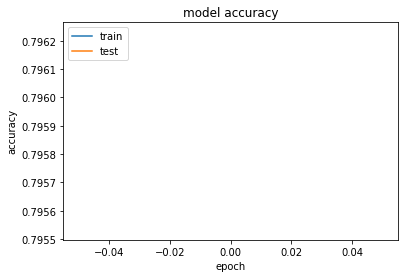

In [ ]:
#List all data in history

#print(model_history.history.keys())

#summarise history fro accuracy
plt.plot(model_history.history['binary_accuracy'])
plt.plot(model_history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

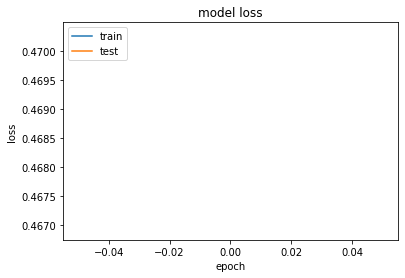

In [ ]:
#Summarise history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Making predictions and evaluating model

In [ ]:
# Predicting the test result
y_pred= clasifier.predict(X_test)
y_pred= (y_pred > 0.5)

In [ ]:
#Making confusion matrx
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_pred,y_test)
print(cm)


[[1595  405]
 [   0    0]]


In [ ]:
#Calculate teh accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print(score)

0.7975
